In [182]:
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta
import requests
import matplotlib.pyplot as plt

In [183]:
df = pd.read_csv("data/bangkok_traffy.csv")
df.describe()

,star,count_reopen
count,274097.000000,787026.000000
mean,3.872801,0.123485
std,1.471863,0.823554
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,100.000000


In [184]:
df.sample(5)

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
90977,2022-KKFW4A,{ถนน},"เขตบางบอน,ฝ่ายเทศกิจ เขตบางบอน,ผอ.เขตบางบอน (น...",เวลา 17.30 น. ของทุกวันจะมีรถขายของจอดหน้าโรงเ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.42484,13.68196",1/9 บางบอน 1 ซอย 12 แยก 5-2 แขวง บางบอน เขตบาง...,บางบอนเหนือ,บางบอน,กรุงเทพมหานคร,2022-07-20 10:35:06.920064+00,เสร็จสิ้น,5.0,0,2022-07-22 09:20:00.046029+00
432800,9MV7KZ,{ถนน},"โครงการตามแนวรถไฟฟ้าสายสีเหลือง,เขตวังทองหลาง,...",ปัญหา: ปากทางเข้าถนนดังกล่าว มีการปิดช่องการจร...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.59427,13.79500","2,4,6 53 ถ. ลาดพร้าว แขวงสะพานสอง เขตวังทองหลา...",สะพานสอง,วังทองหลาง,จังหวัดกรุงเทพมหานคร,2023-11-18 19:45:21.337207+00,เสร็จสิ้น,NaN,0,2024-07-25 07:09:29.651555+00
520134,H4RBNC,"{สัตว์จรจัด,ถนน}","เขตสะพานสูง,ฝ่ายสิ่งแวดล้อมฯ เขตสะพานสูง",ปัญหา: เรื่องเดิม ภายในหมู่บ้านดังกล่าว ตรงข้า...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.69581,13.74392",5 ซอย นักกีฬาแหลมทอง 18 แขวงทับช้าง เขตสะพานสู...,สะพานสูง,สะพานสูง,จังหวัดกรุงเทพมหานคร,2024-03-07 07:23:18.887849+00,เสร็จสิ้น,NaN,0,2024-03-18 07:56:52.184644+00
557712,2024-L64DHT,{},"เขตวังทองหลาง,สน.โชคชัย,สน.วังทองหลาง,สำนักงาน...",รถบรรทุกวิ่งเข้าเขตกทม.ในเวลาห้าม และควันดำ,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.60436,13.78887",2347 ถ. ลาดพร้าว แขวงวังทองหลาง เขตวังทองหลาง ...,วังทองหลาง,วังทองหลาง,กรุงเทพมหานคร,2024-04-30 01:28:14.886036+00,เสร็จสิ้น,NaN,1,2024-05-02 09:39:31.971635+00
49590,2022-KPNHNV,{},"เขตบางเขน,กรมทางหลวง,สำนักการจราจรและขนส่ง กรุ...",ต้องใช้เวลาดำเนินการกี่วันคะ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.62273,13.86043",79/88 ถ. รามอินทรา แขวง อนุสาวรีย์ เขตบางเขน ก...,อนุสาวรีย์,บางเขน,กรุงเทพมหานคร,2022-06-24 15:04:32.935025+00,กำลังดำเนินการ,NaN,0,2024-06-27 06:42:05.361258+00


# Date

In [185]:
finished_df = df[df['state'] == 'เสร็จสิ้น']

In [186]:
filtered_df = finished_df.dropna(axis=0, how='any', subset=['timestamp', 'last_activity'])

In [187]:
def toDate(serie):
    return pd.to_datetime(serie, format='ISO8601').dt.tz_localize(None) + timedelta(hours=7)

filtered_df['timestamp'] = toDate(filtered_df['timestamp'])
filtered_df['last_activity'] = toDate(filtered_df['last_activity'])

filtered_df['duration'] = (filtered_df['last_activity'] - filtered_df['timestamp']).dt.total_seconds() // 60
filtered_df.sample(5)

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity,duration
335446,2023-G2PB9K,{ความปลอดภัย},"เขตดอนเมือง,ฝ่ายโยธา เขตดอนเมือง",ประสานงานหน่วยง่านเกี่ยวข้องหน่อยครัย หน้า 7-...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.56879,13.92673",111 ถนน วัดเวฬุวนาราม แขวงดอนเมือง เขตดอนเมือง...,ดอนเมือง,ดอนเมือง,กรุงเทพมหานคร,2023-07-27 17:34:32.790099,เสร็จสิ้น,5.0,0,2023-08-05 12:13:18.104128,12638.0
563551,2024-DFBKBF,"{ทางเท้า,กีดขวาง}","เขตราชเทวี,ฝ่ายเทศกิจ เขตราชเทวี",จอดรถบนทางเท้า กับ ขี่มอเตอไซบนทางเท้า,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.52290,13.75473",846 15 ถนนพระราม 6 ซอย 23 แขวงถนนเพชรบุรี เขตร...,ถนนเพชรบุรี,ราชเทวี,กรุงเทพมหานคร,2024-05-07 16:52:42.911385,เสร็จสิ้น,NaN,0,2024-05-07 21:10:39.549621,257.0
81117,2022-LUDD9G,{ถนน},"เขตคลองสามวา,ฝ่ายโยธา เขตคลองสามวา,ผอ.เขตคลองส...",พื้นถนนเป็นเนินสูง,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.70770,13.83513",312 ซอย พระยาสุเรนทร์ 30 แขวง บางชัน เขตคลองสา...,บางชัน,คลองสามวา,กรุงเทพมหานคร,2022-07-11 14:03:55.390952,เสร็จสิ้น,NaN,0,2022-08-20 13:11:56.779143,57548.0
739157,X6G2RH,"{ถนน,จราจร}","เขตวัฒนา,สำนักการจราจรและขนส่ง กรุงเทพมหานคร (...",ปัญหา: ภายในซอยดังกล่าว หน้าร้านอาหารโอเปร่า พ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.56944,13.73739",102 ซอย พร้อมจิตร แขวงคลองตันเหนือ เขตวัฒนา กร...,คลองตันเหนือ,วัฒนา,จังหวัดกรุงเทพมหานคร,2024-11-19 20:41:27.581507,เสร็จสิ้น,NaN,0,2024-12-19 13:36:39.111729,42775.0
499257,2024-NRCFLH,{},"เขตดินแดง,สำนักสิ่งแวดล้อม กทม.,ฝ่ายสิ่งแวดล้อ...",ใบอนุญาตที่ได้รับจากกระทรวงสาธารณสุขนั้น ได้ตร...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.56522,13.76467",582/269 ซ อยู่เจริญ แขวงดินแดง เขตดินแดง กรุงเ...,ดินแดง,ดินแดง,กรุงเทพมหานคร,2024-02-09 20:41:31.543250,เสร็จสิ้น,NaN,1,2024-11-05 21:14:25.755833,388832.0


In [188]:
filtered_df['type'].fillna('{}', inplace=True)
filtered_df['type'].isna().sum()

/tmp/ipykernel_53019/4244501731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df['type'].fillna('{}', inplace=True)


np.int64(0)

In [189]:
# Define allowed categories
target_types = {
 '',
 'ป้าย',
 'ความสะอาด',
 'แสงสว่าง',
 'สอบถาม',
 'ร้องเรียน',
 'การเดินทาง',
 'จราจร',
 'ท่อระบายน้ำ',
 'สะพาน',
 'เสียงรบกวน',
 'ต้นไม้',
 'คนจรจัด',
 'คลอง',
 'ถนน',
 'เสนอแนะ',
 'กีดขวาง',
 'สายไฟ',
 'PM2.5',
 'น้ำท่วม',
 'ทางเท้า',
 'สัตว์จรจัด',
 'ความปลอดภัย',
 'ห้องน้ำ',
 'ป้ายจราจร'
}

# Function to convert string to list
def parse_categories(s):
    # Remove curly braces and split
    return s.strip('{}').split(',')

# Parse the string column
filtered_df['type_list'] = filtered_df['type'].apply(parse_categories)

# Create binary flags
for cat in target_types:
    filtered_df[cat] = filtered_df['type_list'].apply(lambda lst: int(cat in lst))

# Create 'Others' column
filtered_df['Others'] = filtered_df['type_list'].apply(
    lambda lst: int(any(c not in target_types for c in lst))
)

# Drop intermediate column if you want
filtered_df.drop(columns='type_list', inplace=True)

filtered_df[['type'] + list(target_types)].sample(5)

,type,,สะพาน,ห้องน้ำ,สายไฟ,PM2.5,สัตว์จรจัด,ท่อระบายน้ำ,สอบถาม,กีดขวาง,...,น้ำท่วม,ร้องเรียน,ต้นไม้,แสงสว่าง,การเดินทาง,เสียงรบกวน,จราจร,คลอง,ทางเท้า,คนจรจัด
50973,{ถนน},0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372157,"{ร้องเรียน,ถนน,จราจร}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
702529,{ทางเท้า},0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
559599,{กีดขวาง},0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
563519,{จราจร},0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [190]:
# Define working hours
start_time = time(9, 30)
end_time = time(15, 30)

def minutes_to_next_working_hour(dt):
    weekday = dt.weekday()  # 0 = Monday, ..., 6 = Sunday
    current_time = dt.time()

    # If it's a weekend or after working hours, find next weekday at 9:30
    if weekday >= 5 or current_time >= end_time:
        # Add days until next weekday (Monday–Friday)
        days_ahead = 1
        while (dt + timedelta(days=days_ahead)).weekday() >= 5:
            days_ahead += 1
        next_working_start = datetime.combine((dt + timedelta(days=days_ahead)).date(), start_time)
        return int((next_working_start - dt).total_seconds() // 60)

    # Before work hours today
    elif current_time < start_time:
        today_start = datetime.combine(dt.date(), start_time)
        return int((today_start - dt).total_seconds() // 60)

    # During working hours
    else:
        return 0

# Apply function to timestamp column
filtered_df['until_working_time'] = filtered_df['timestamp'].apply(minutes_to_next_working_hour)

filtered_df[['timestamp', 'until_working_time']].sample(5)

,timestamp,until_working_time
229709,2023-03-04 19:49:45.214107,2260
321897,2023-07-12 17:28:34.073991,961
123876,2022-08-22 08:19:13.650615,70
547697,2024-04-14 08:05:05.013077,1524
497456,2024-02-07 19:00:59.038382,869


# Org's info

In [191]:
limit = 100
org_key = 'bangkok'
url = f'https://publicapi.traffy.in.th/premium-org-fondue/statistic-rank/top-rank-avg-star?org_key={org_key}&limit={limit}'

resp = requests.get(url)
data = resp.json()
orgs = data['results']

pd.DataFrame(orgs).to_csv('data/org.csv')

In [192]:
orgs = pd.read_csv('data/org.csv')
orgs.sample(5)
orgs.drop(columns=['Unnamed: 0'], inplace=True)
# orgs.reset_index(inplace=True)
orgs.set_index('fonduegroup_name', inplace=True)
orgs.sample(5)

,rank,timestamp,fonduegroup_id,post_count_star,post_count_star_stat,avg_star,post_count_all,post_count_finish,post_finish_percentage,avg_duration_minutes_inprogress,avg_duration_minutes_finished
fonduegroup_name,,,,,,,,,,,
สำนักงบประมาณกรุงเทพมหานคร,1,NaN,18122,42,"{'star_1': 5, 'star_2': 0, 'star_3': 6, 'star_...",4.21,65,61,93.85,4397,43436
เขตบางกอกใหญ่,41,NaN,18022,2219,"{'star_1': 378, 'star_2': 101, 'star_3': 202, ...",3.83,7628,6441,84.44,14067,76106
เขตประเวศ,42,NaN,18033,10039,"{'star_1': 1631, 'star_2': 510, 'star_3': 1016...",3.82,31791,26806,84.32,9059,76399
เขตหนองจอก,4,NaN,18051,5552,"{'star_1': 617, 'star_2': 217, 'star_3': 447, ...",4.13,16137,13771,85.34,9648,113798
เขตสัมพันธวงศ์,46,NaN,18049,2219,"{'star_1': 413, 'star_2': 110, 'star_3': 183, ...",3.80,6060,5052,83.37,6778,45202


In [193]:
# Define target columns
target_cols = ['avg_star', 'post_finish_percentage', 'avg_duration_minutes_finished']

# Convert organization string to list
filtered_df['orgs_list'] = filtered_df['organization'].str.strip().str.split(',')

# Create filtered_df with NaNs in target columns
filtered_df[target_cols] = np.nan

# Explode orgs_list to merge with orgs
exploded = filtered_df[['orgs_list']].explode('orgs_list').reset_index()
exploded['orgs_list'] = exploded['orgs_list'].str.strip()

# Join with orgs DataFrame
merged = exploded.merge(orgs[target_cols], left_on='orgs_list', right_index=True, how='left')

# Aggregate mean values for each original row
means = merged.groupby('index')[target_cols].mean()

# Assign the means back to filtered_df
filtered_df.loc[means.index, target_cols] = means

# Result
filtered_df[['orgs_list'] + target_cols]

filtered_df.drop(columns=['orgs_list'], inplace=True)


In [194]:
filtered_df.columns

Index(['ticket_id', 'type', 'organization', 'comment', 'photo', 'photo_after',
       'coords', 'address', 'subdistrict', 'district', 'province', 'timestamp',
       'state', 'star', 'count_reopen', 'last_activity', 'duration', '',
       'สะพาน', 'ห้องน้ำ', 'สายไฟ', 'PM2.5', 'สัตว์จรจัด', 'ท่อระบายน้ำ',
       'สอบถาม', 'กีดขวาง', 'ความสะอาด', 'ป้าย', 'ถนน', 'ป้ายจราจร',
       'ความปลอดภัย', 'เสนอแนะ', 'น้ำท่วม', 'ร้องเรียน', 'ต้นไม้', 'แสงสว่าง',
       'การเดินทาง', 'เสียงรบกวน', 'จราจร', 'คลอง', 'ทางเท้า', 'คนจรจัด',
       'Others', 'until_working_time', 'avg_star', 'post_finish_percentage',
       'avg_duration_minutes_finished'],
      dtype='object')

In [195]:
def plot_bin(s, bins = 100):
    s.plot(kind='hist', bins=bins, edgecolor='black')

    # Add labels and title
    plt.xlabel('duration (minutes)')
    plt.ylabel('Frequency')

    # Show plot
    plt.show()

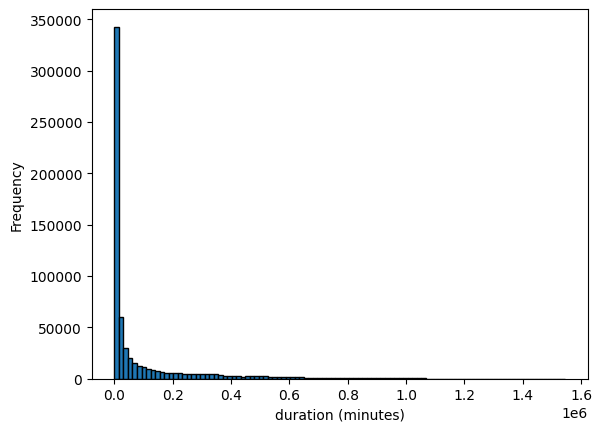

In [196]:
s = filtered_df['duration'] 
threshold = s.quantile(1)
s_trimmed = s[s < threshold]

plot_bin(s)


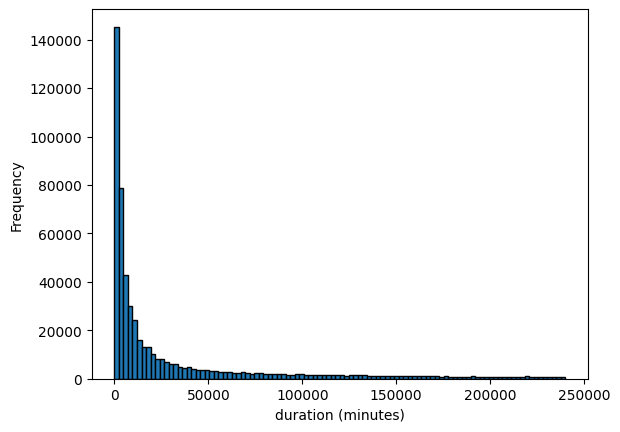

In [197]:
# Assuming `s` is your Pandas Series
s = filtered_df['duration']
Q1 = s.quantile(0.25)
Q3 = s.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = filtered_df[(s >= lower_bound) & (s <= upper_bound)]

s_filtered = filtered_df['duration']

plot_bin(s_filtered)

## Cut outlier

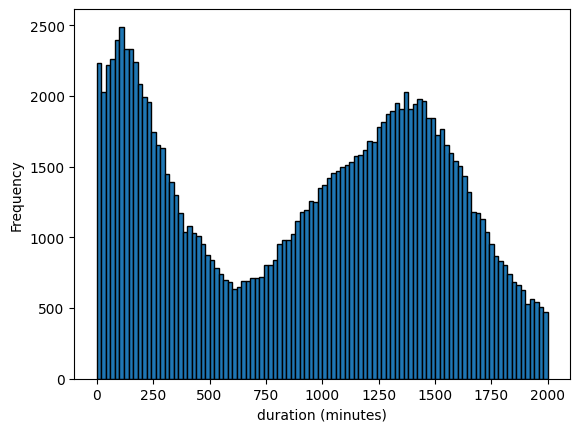

In [206]:
lower_bound = 0
upper_bound = 2_000

duration = filtered_df['duration']
filtered_df = filtered_df[(duration >= lower_bound) & (duration <= upper_bound)]

plot_bin(filtered_df['duration'])

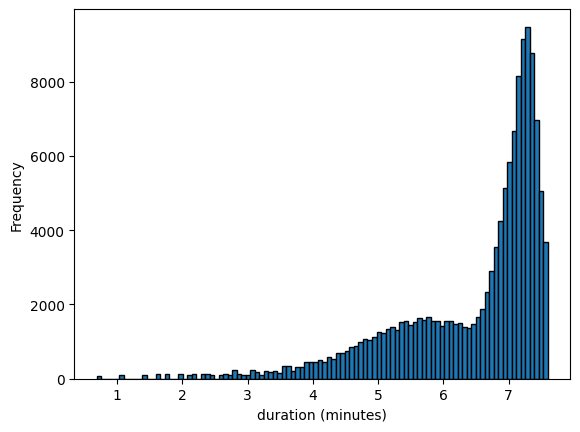

In [207]:
filtered_df = filtered_df[filtered_df['duration'] > 0]

filtered_df['log_duration'] = filtered_df['duration'].apply(np.log1p) 

plot_bin(filtered_df['log_duration'])

In [208]:
types = [
 'ป้าย',
 'ความสะอาด',
 'แสงสว่าง',
 'สอบถาม',
 'ร้องเรียน',
 'การเดินทาง',
 'จราจร',
 'ท่อระบายน้ำ',
 'สะพาน',
 'เสียงรบกวน',
 'ต้นไม้',
 'คนจรจัด',
 'คลอง',
 'ถนน',
 'เสนอแนะ',
 'กีดขวาง',
 'สายไฟ',
 'PM2.5',
 'น้ำท่วม',
 'ทางเท้า',
 'สัตว์จรจัด',
 'ความปลอดภัย',
 'ห้องน้ำ',
 'ป้ายจราจร',
 'Others'
]

feature_cols = [
    'until_working_time',
    'avg_star',
    'post_finish_percentage',
    'avg_duration_minutes_finished',
]

target_cols = [
    'duration',
    'log_duration',
]

cols = target_cols + feature_cols + types

filtered_df = filtered_df[cols]
filtered_df

,duration,log_duration,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
197,1.0,0.693147,908,4.09,85.420,50067.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
204,30.0,3.433987,0,4.09,85.420,50067.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
208,2.0,1.098612,1059,4.09,85.420,50067.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
209,2.0,1.098612,1048,4.09,85.420,50067.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
217,6.0,1.945910,0,4.09,85.420,50067.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786856,450.0,6.111467,453,3.92,73.165,138599.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786892,82.0,4.418841,151,3.59,72.540,92196.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
786893,100.0,4.615121,150,4.00,86.020,65512.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
786944,70.0,4.262680,72,3.87,84.180,72567.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
filtered_df.isna().sum()

duration                           0
log_duration                       0
until_working_time                 0
avg_star                         256
post_finish_percentage           256
avg_duration_minutes_finished    256
ป้าย                               0
ความสะอาด                          0
แสงสว่าง                           0
สอบถาม                             0
ร้องเรียน                          0
การเดินทาง                         0
จราจร                              0
ท่อระบายน้ำ                        0
สะพาน                              0
เสียงรบกวน                         0
ต้นไม้                             0
คนจรจัด                            0
คลอง                               0
ถนน                                0
เสนอแนะ                            0
กีดขวาง                            0
สายไฟ                              0
PM2.5                              0
น้ำท่วม                            0
ทางเท้า                            0
สัตว์จรจัด                         0
ค

In [210]:
# na_cols = ['avg_star', 'post_finish_percentage', 'avg_duration_minutes_finished']

# filtered_df[na_cols] = filtered_df[na_cols].fillna(filtered_df[na_cols].mean())

In [211]:
filtered_df.isna().sum()

duration                           0
log_duration                       0
until_working_time                 0
avg_star                         256
post_finish_percentage           256
avg_duration_minutes_finished    256
ป้าย                               0
ความสะอาด                          0
แสงสว่าง                           0
สอบถาม                             0
ร้องเรียน                          0
การเดินทาง                         0
จราจร                              0
ท่อระบายน้ำ                        0
สะพาน                              0
เสียงรบกวน                         0
ต้นไม้                             0
คนจรจัด                            0
คลอง                               0
ถนน                                0
เสนอแนะ                            0
กีดขวาง                            0
สายไฟ                              0
PM2.5                              0
น้ำท่วม                            0
ทางเท้า                            0
สัตว์จรจัด                         0
ค

In [212]:
display(filtered_df)
filtered_df.to_csv('data/clean.csv', index=False)

,duration,log_duration,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
197,1.0,0.693147,908,4.09,85.420,50067.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
204,30.0,3.433987,0,4.09,85.420,50067.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
208,2.0,1.098612,1059,4.09,85.420,50067.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
209,2.0,1.098612,1048,4.09,85.420,50067.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
217,6.0,1.945910,0,4.09,85.420,50067.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786856,450.0,6.111467,453,3.92,73.165,138599.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786892,82.0,4.418841,151,3.59,72.540,92196.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
786893,100.0,4.615121,150,4.00,86.020,65512.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
786944,70.0,4.262680,72,3.87,84.180,72567.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
